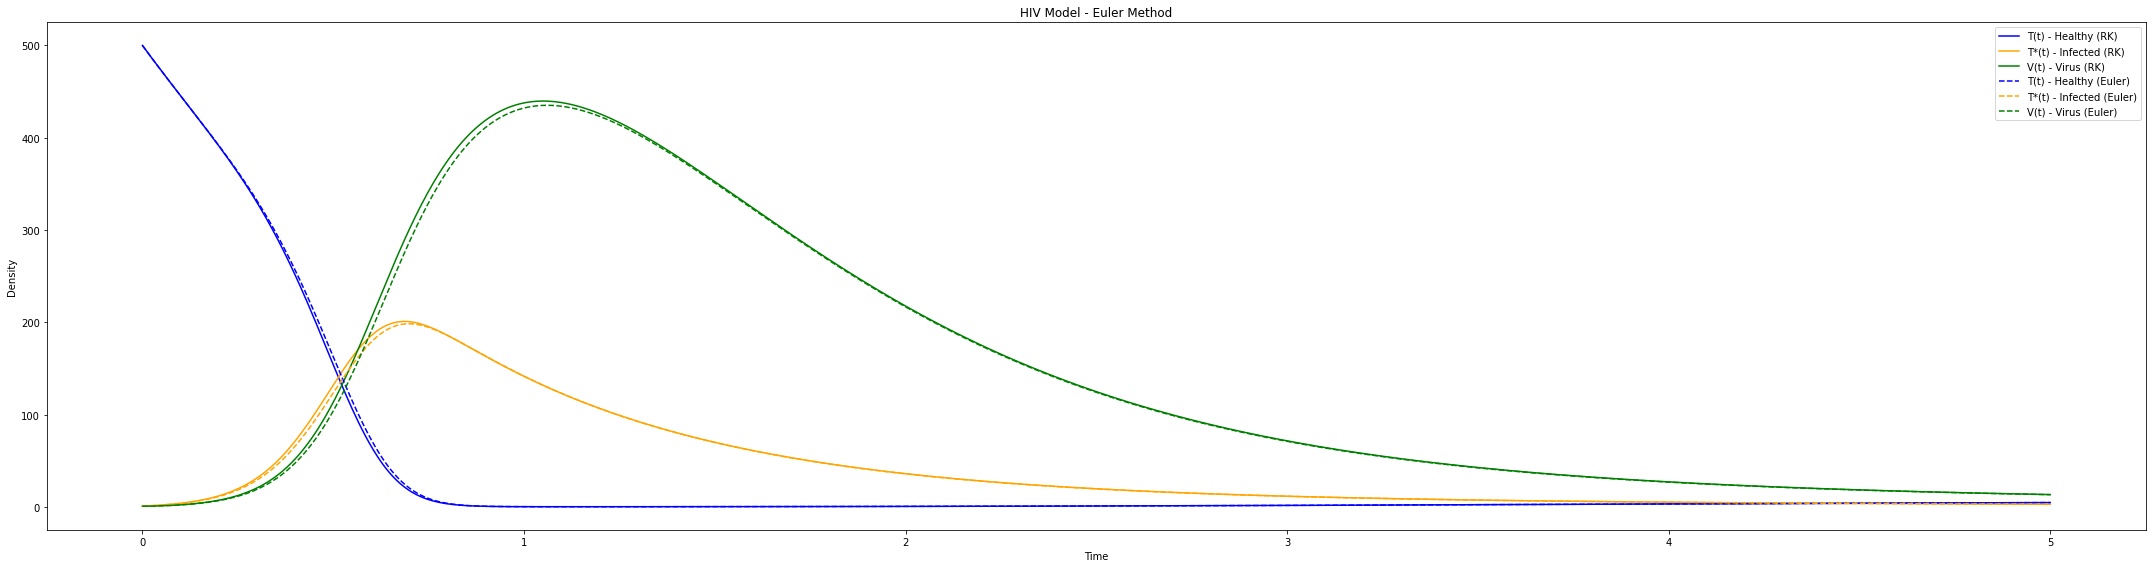

In [20]:
import numpy as np
import matplotlib.pyplot as plt

A = 10      
b = 0.048 
mu = 1.1    
mu_star = 1.5
g = 8  
nu = 2.4       

T0 = 500    
T_star0 = 1  
V0 = 1      
initial_conditions = [T0, T_star0, V0]

t_span = [0, 5]
t_eval = np.linspace(t_span[0], t_span[1], 1000)

def hiv_model(t, y):
    T, T_star, V = y
    dT_dt = A - b * T * V - mu * T
    dT_star_dt = b * T * V - mu_star * T_star
    dV_dt = g * T_star - nu * V
    return np.array([dT_dt, dT_star_dt, dV_dt])  

def runge_kutta_4th_order(f, y0, t_values):
    y = np.zeros((len(t_values), len(y0))) 
    y[0] = y0  
    
    for i in range(1, len(t_values)):
        t = t_values[i - 1]
        h = t_values[i] - t_values[i - 1]
        y_i = y[i - 1]
        
        k1 = h * f(t, y_i)
        k2 = h * f(t + h / 2, y_i + k1 / 2)
        k3 = h * f(t + h / 2, y_i + k2 / 2)
        k4 = h * f(t + h, y_i + k3)
        
        y[i] = y_i + (k1 + 2 * k2 + 2 * k3 + k4) / 6
    
    return y

solution_rk4 = runge_kutta_4th_order(hiv_model, initial_conditions, t_eval)

def euler_method(f, y0, t):
    y = np.zeros((len(t), len(y0)))
    y[0] = y0
    for i in range(1, len(t)):
        dt = t[i] - t[i-1]
        y[i] = y[i-1] + dt * np.array(f(t[i-1], y[i-1]))
    return y

euler_solution = euler_method(hiv_model, initial_conditions, t_eval)


plt.figure(figsize=(30, 8))

plt.subplot(1, 1, 1)
plt.plot(t_eval, solution_rk4[:, 0], label='T(t) - Healthy (RK)', color='blue')
plt.plot(t_eval, solution_rk4[:, 1], label='T*(t) - Infected (RK)', color='orange')
plt.plot(t_eval, solution_rk4[:, 2], label='V(t) - Virus (RK)', color='green')
plt.title('HIV Model - Runge-Kutta Method')
plt.xlabel('Time')
plt.ylabel('Density')
plt.legend()

plt.subplot(1, 1, 1)
plt.plot(t_eval, euler_solution[:, 0], label='T(t) - Healthy (Euler)', color='blue', linestyle='dashed')
plt.plot(t_eval, euler_solution[:, 1], label='T*(t) - Infected (Euler)', color='orange', linestyle='dashed')
plt.plot(t_eval, euler_solution[:, 2], label='V(t) - Virus (Euler)', color='green', linestyle='dashed')
plt.title('HIV Model - Euler Method')
plt.xlabel('Time')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()


In [6]:

A = 10       
b = 0.048 
mu = 1.1    
mu_star = 1.5
g = 8  
nu = 2.4       

R0 = (A * b * g) / (mu * mu_star * nu)

print(f"Основное репродуктивное число (R0): {R0}")

if R0 < 1:
    print("Состояние без болезни (DFE) устойчиво, инфекция исчезает.")
else:
    print("Состояние без болезни неустойчиво, инфекция распространяется.")


Основное репродуктивное число (R0): 0.9696969696969697
Состояние без болезни (DFE) устойчиво, инфекция исчезает.
